In [26]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42568 sha256=4a5d988c5d74e3f7e84235fff3b5a1c309506ce38757b168cb6ef220f3af972b
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pr
from sklearn import feature_selection  as fs
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
from factor_analyzer import FactorAnalyzer, factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

**Одномерный подход для отбора признаков**

In [8]:
df = pd.read_csv('/content/drive/MyDrive/pima-indians-diabetes.data.csv', index_col=0)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df_X = df.drop('class', axis = 1)
df_X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
df_y = df['class']

In [11]:
np.set_printoptions(precision=3)

**F-критерий**

In [12]:
test = fs.SelectKBest (score_func=fs.f_classif, k = 4)

In [13]:
fit = test.fit(df_X,df_y)

In [14]:
fit.scores_

array([ 39.67 , 213.162,   3.257,   4.304,  13.281,  71.772,  23.871,
        46.141])

In [15]:
fit.get_support()

array([ True,  True, False, False, False,  True, False,  True])

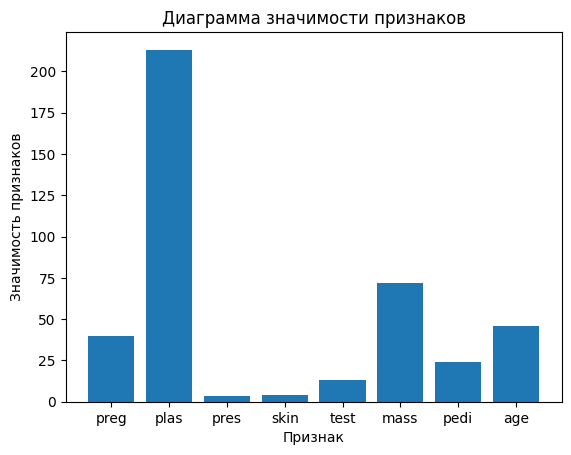

In [16]:
plt.bar(df_X.columns,fit.scores_ )
plt.xlabel ('Признак')
plt.ylabel('Значимость признаков')
plt.title ('Диаграмма значимости признаков');

**Отбор признаков при помощи исключения наименее значимых**

In [17]:
model = LogisticRegression(solver='liblinear')

In [18]:
rfe = fs.RFE(model, n_features_to_select=4)

In [19]:
fit = rfe.fit(df_X,df_y)

In [20]:
fit.n_features_

4

In [21]:
fit.support_

array([ True,  True, False, False, False,  True,  True, False])

In [22]:
fit.ranking_

array([1, 1, 2, 4, 5, 1, 1, 3])

**Применение классифакотора  дополнительных деревьев для отбора признаков**

In [23]:
model = ExtraTreesClassifier(n_estimators=100).fit(df_X,df_y)

In [24]:
model.feature_importances_

array([0.109, 0.241, 0.1  , 0.078, 0.078, 0.135, 0.119, 0.14 ])

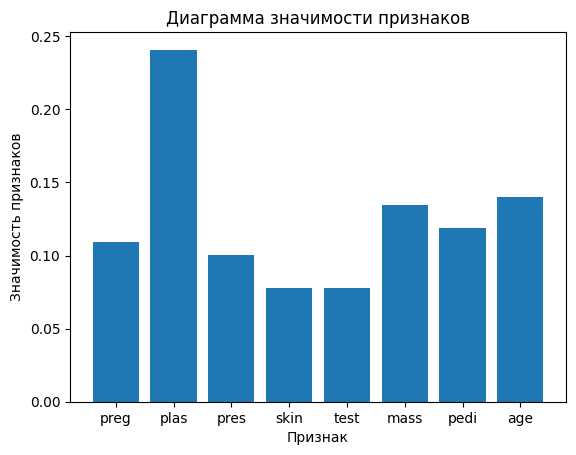

In [25]:
plt.bar(df_X.columns,model.feature_importances_)
plt.xlabel ('Признак')
plt.ylabel('Значимость признаков')
plt.title ('Диаграмма значимости признаков');

**Факторный анализ**

In [28]:
df = pd.read_csv('/content/drive/MyDrive/stickleback.csv', index_col=0)
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


In [29]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


1. Анализ корреляции между признаками

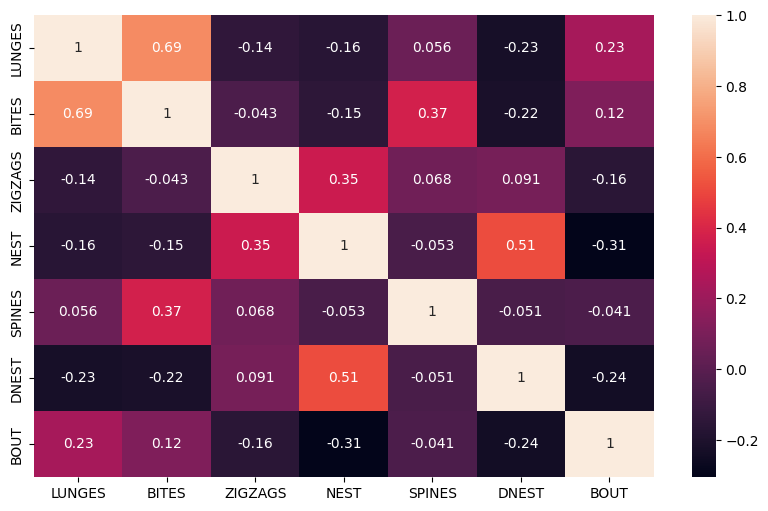

In [32]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True);

In [33]:
calculate_bartlett_sphericity(df)

(78.65570932525837, 1.3528985212723955e-08)

In [34]:
kmo_all,kmo_model = calculate_kmo(df)

In [35]:
kmo_model

0.536090482930058

In [36]:
kmo_all

array([0.505, 0.495, 0.546, 0.582, 0.346, 0.625, 0.768])

2.1 Выделение первоначальный факторов методом главных компонент

In [44]:
df_scaled = pr.scale(df)

In [45]:
df.shape

(54, 7)

In [46]:
pca= PCA(n_components=7).fit(df_scaled)

In [47]:
pca.explained_variance_

array([2.331, 1.482, 0.998, 0.903, 0.767, 0.412, 0.239])

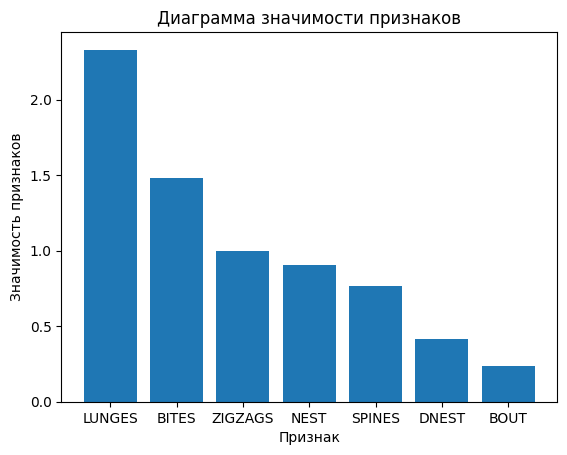

In [48]:
plt.bar(df.columns,pca.explained_variance_)
plt.xlabel ('Признак')
plt.ylabel('Значимость признаков')
plt.title ('Диаграмма значимости признаков');

2.2 Выделение факторов при помощи Факторного Анализа

In [49]:
fa = FactorAnalyzer().fit(df_scaled)

In [50]:
eigen_values,vectors = fa.get_eigenvalues()

In [51]:
eigen_values

array([2.288, 1.454, 0.979, 0.886, 0.753, 0.405, 0.234])

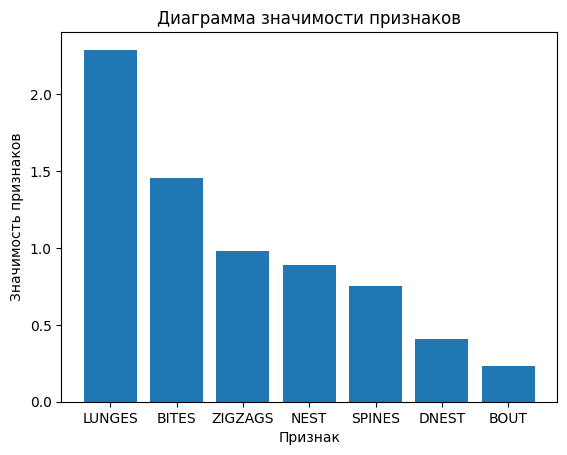

In [52]:
plt.bar(df.columns,eigen_values)
plt.xlabel ('Признак')
plt.ylabel('Значимость признаков')
plt.title ('Диаграмма значимости признаков');

2.3. Выделение количества факторов методом Кеттела

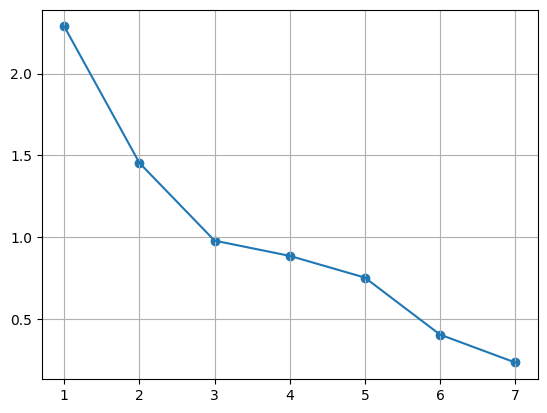

In [53]:
plt.scatter(range(1,df_scaled.shape[1] + 1), eigen_values)
plt.plot(range(1,df_scaled.shape[1] + 1), eigen_values)
plt.grid();

3. Факторный анализ

In [54]:
fa.set_params(n_factors = 3, rotation = 'varimax').fit(df_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

4. Выводим на экран факторную структуру

In [55]:
loadings = pd.DataFrame (fa.loadings_, columns = ['factor_1','factor_2','factor_3'], index = df.columns)
loadings

,factor_1,factor_2,factor_3
LUNGES,-0.213815,0.876088,0.022384
BITES,-0.110001,0.742419,0.588652
ZIGZAGS,0.342123,-0.076383,0.107402
NEST,0.989281,0.058242,-0.141253
SPINES,0.025750,0.057196,0.564226
DNEST,0.501341,-0.134760,-0.111540
BOUT,-0.359746,0.185878,-0.089865


In [56]:
df_final = pd.DataFrame (fa.fit_transform(df_scaled), columns = ['NEST','LUNGES','BITES'])
df_final.head()

,NEST,LUNGES,BITES
0,-0.408115,-1.085631,-0.389292
1,-0.543282,-0.055818,-0.383780
2,-0.184006,-0.446107,-0.900993
3,-0.294362,0.321699,1.801099
4,4.502197,0.880367,-0.745598


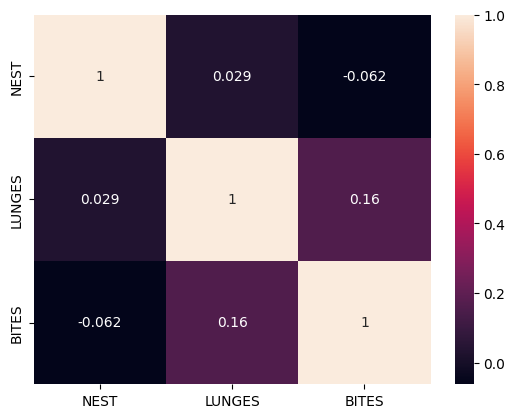

In [59]:
sns.heatmap(df_final.corr(),annot=True);